# Data-Driven Analysis and Clustering of Football Players Based on Skill Attributes

This project aims to analyze football player data using data-driven techniques to uncover meaningful patterns in player performance. By focusing on skill-based attributes such as passing, dribbling, pace, shooting, defending, and physical strength, the players are grouped into similar clusters using machine learning algorithms such as K-Means or Hierarchical Clustering.

## INITIALIZATION AND READING THE DATA

The first step in the analysis involves loading the required Python libraries and importing the dataset containing detailed attributes of football players. These libraries are essential for data cleaning, visualization, and machine learning tasks such as clustering.

In [1]:
# IMPORTING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
# DATASET LINK IS STORED IN VARIABLE 'url'
url = "https://drive.google.com/uc?export=download&id=1Y4HfrFfunN9YH4a7y4HXbl3lWYXygJEb"

In [4]:
# READING DATASET FROM GOOGLE DRIVE LINK INTO DATAFRAME
fifa = pd.read_csv(url)

In [5]:
fifa

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

## BASIC CHECKS

After loading the dataset, initial checks are performed to understand its structure and quality. This step helps verify whether the data is suitable for further analysis. It includes:

*   Viewing the first few rows to understand the layout.
*   Checking the shape (number of players and attributes).
*   Inspecting data types of each column.
*   Identifying missing values or anomalies.
*   Generating summary statistics to observe data distribution.

These checks provide a foundation for data cleaning, feature selection, and clustering in later stages.

In [6]:
# DISPLAY FIRST 5 ROWS OF THE DATASET
fifa.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [7]:
# DISPLAY LAST 5 ROWS OF THE DATASET
fifa.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [8]:
# DISPLAY TOTAL NUMBER OF ROWS AND COLUMNS IN THE DATASET
fifa.shape

(18278, 104)

The output (18278, 104) indicates that the dataset contains:

*   18,278 rows → Each row represents a football player.
*   104 columns → Each column represents a specific attribute or feature of a player (such as age, nationality, club, overall rating, passing, dribbling, etc.).

This shows that the dataset is large and feature-rich, which makes it suitable for data-driven analysis and clustering.

In [9]:
# DISPLAY LIST OF ALL COLUMN NAMES IN THE DATASET
list(fifa.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [10]:
# DISPLAY DATA TYPES, NON-NULL VALUES AND MEMORY USAGE OF THE DATASET
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


The dataset contains a mix of numerical and categorical features, suitable for both statistical analysis and machine learning.

In [11]:
# DISPLAY STATISTICAL SUMMARY OF NUMERICAL COLUMNS IN THE DATASET
fifa.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [12]:
# CHECK TOTAL NUMBER OF MISSING VALUES IN EACH COLUMN
fifa.isnull().sum()

,0
sofifa_id,0
player_url,0
short_name,0
long_name,0
age,0
...,...
lb,2036
lcb,2036
cb,2036
rcb,2036


The output shows that some columns contain missing values. This is common in real-world datasets and must be addressed before applying clustering or machine learning algorithms.

In [13]:
# CHECK TOTAL NUMBER OF DUPLICATE ROWS IN THE DATASET
fifa.duplicated().sum()

np.int64(0)

No duplicate rows were found in the dataset. This indicates that each player entry is unique, which ensures data integrity and allows us to proceed confidently with further analysis.

In [14]:
# CREATE A COPY OF THE ORIGINAL DATASET FOR FURTHER PROCESSING
fifa1=fifa.copy()

In [15]:
# PRINT UNIQUE VALUE COUNT FOR EACH COLUMN TO UNDERSTAND DATA VARIABILITY
for col in fifa.columns:
    print(f"{col}: {fifa[col].nunique()}")

sofifa_id: 18278
player_url: 18278
short_name: 17354
long_name: 18218
age: 27
dob: 6142
height_cm: 49
weight_kg: 56
nationality: 162
club: 698
overall: 47
potential: 47
value_eur: 214
wage_eur: 141
player_positions: 643
preferred_foot: 2
international_reputation: 5
weak_foot: 5
skill_moves: 5
work_rate: 9
body_type: 10
real_face: 2
release_clause_eur: 1224
player_tags: 83
team_position: 29
team_jersey_number: 99
loaned_from: 316
joined: 1760
contract_valid_until: 8
nation_position: 26
nation_jersey_number: 30
pace: 70
shooting: 79
passing: 68
dribbling: 71
defending: 76
physic: 61
gk_diving: 47
gk_handling: 47
gk_kicking: 52
gk_reflexes: 48
gk_speed: 53
gk_positioning: 50
player_traits: 921
attacking_crossing: 88
attacking_finishing: 93
attacking_heading_accuracy: 89
attacking_short_passing: 84
attacking_volleys: 87
skill_dribbling: 92
skill_curve: 89
skill_fk_accuracy: 89
skill_long_passing: 85
skill_ball_control: 90
movement_acceleration: 86
movement_sprint_speed: 86
movement_agility

In [16]:
col_to_drop=['dob','sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number','joined']
fifa.drop(columns=col_to_drop,inplace=True)

Certain columns such as date of birth, URLs, player IDs, names, and loan details contain mostly unique values, which do not contribute to clustering or player analysis. Since these features do not provide meaningful patterns and may introduce noise, they are dropped from the dataset.

In [17]:
fifa

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,164700000.0,NaN,GK,13.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao

In [18]:
# DISPLAY PLAYER NAMES AND THEIR PLAYING POSITIONS
fifa[['short_name','player_positions']]

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
...,...,...
18273,Shao Shuai,CB
18274,Xiao Mingjie,CB
18275,Zhang Wei,CM
18276,Wang Haijian,CM


In [19]:
# CONVERT PLAYER POSITIONS INTO ONE-HOT ENCODED COLUMNS WITH PREFIX 'POSITION_'
new_player_positions = fifa['player_positions'].str.get_dummies(sep=', ').add_prefix('Position_')

In [20]:
# VIEW THE ONE-HOT ENCODED POSITION COLUMNS
new_player_positions

,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18274,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18275,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18276,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:
# CONCATENATE ONE-HOT ENCODED POSITION COLUMNS WITH THE ORIGINAL DATASET
fifa=pd.concat([fifa,new_player_positions],axis=1)

In [22]:
fifa= fifa.drop('player_positions',axis=1)

After converting player_positions into multiple one-hot encoded columns, the original column is no longer needed. Keeping it would create redundancy, as its information is already represented in the new encoded columns (Position_CM, Position_ST, etc.).

In [23]:
position_col=['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']

In [24]:
# EXTRACT ONLY THE BASE RATING BEFORE '+' FROM EACH POSITION COLUMN
for col in position_col:
    fifa[col] = fifa[col].str.split('+',n=1,expand=True)[0]

In [25]:
fifa

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,release_clause_eur,player_tags,team_position,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Position_CAM,Position_CB,Position_CDM,Position_CF,Position_CM,Position_GK,Position_LB,Position_LM,Position_LW,Position_LWB,Position_RB,Position_RM,Position_RW,Position_RWB,Position_ST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,Left,5,4,4,Medium/Low,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89,89,89,93,93,93,93,93,93,93,93,92,87,87,87,92,68,66,66,66,68,63,52,52,52,63,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,Right,5,4,5,High/Low,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,Right,5,5,5,High/Medium,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84,84,84,90,89,89,89,90,90,90,90,89,82,82,82,89,66,61,61,61,66,61,46,46,46,61,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,Right,3,3,1,Medium/Medium,164700000.0,NaN,GK,13.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,Right,4,4,4,High/Medium,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83,83,83,89,88,88,88,89,89,89,89,89,83,83,83,89,66,63,63,63,66,61,49,49,49,61,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### HANDLING MISSING VALUES

Handling missing values is done before Exploratory Data Analysis (EDA) because missing or inconsistent data can distort insights and lead to misleading conclusions.

In [26]:
# REPLACE ALL MISSING VALUES IN THE DATASET WITH ZERO
col=fifa.columns
fifa[col]=fifa[col].fillna(0)

Median imputation is generally useful for handling missing values in numerical data. However, in this dataset, missing values in certain positional attributes (such as midfield or attacking roles) may indicate that the player does not play in that position at all — especially for goalkeepers or defenders.

## EXPLORATORY DATA ANALYSIS(EDA)

Exploratory Data Analysis is performed to understand the structure, patterns, and relationships within the dataset. It helps in identifying key trends, detecting outliers, and selecting meaningful features for further modeling and clustering.

The goal of this EDA is to understand the overall structure, distribution, and relationships within the FIFA dataset before performing task-specific analysis or clustering.

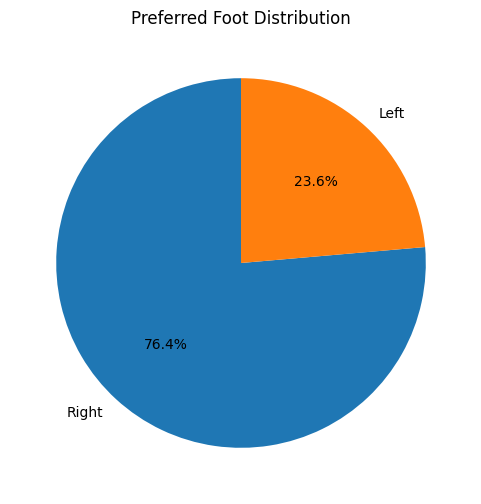

In [27]:
# PIE CHART SHOWING DISTRIBUTION OF PLAYERS' PREFERRED FOOT
preferred_counts = fifa['preferred_foot'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    preferred_counts,
    labels=preferred_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Preferred Foot Distribution")
plt.show()

The majority of players in the dataset are right-footed (76.4%), while only 23.6% are left-footed. This aligns with real-world football trends and suggests that left-footed players are relatively rare, potentially making them more valuable for tactical and attacking roles.

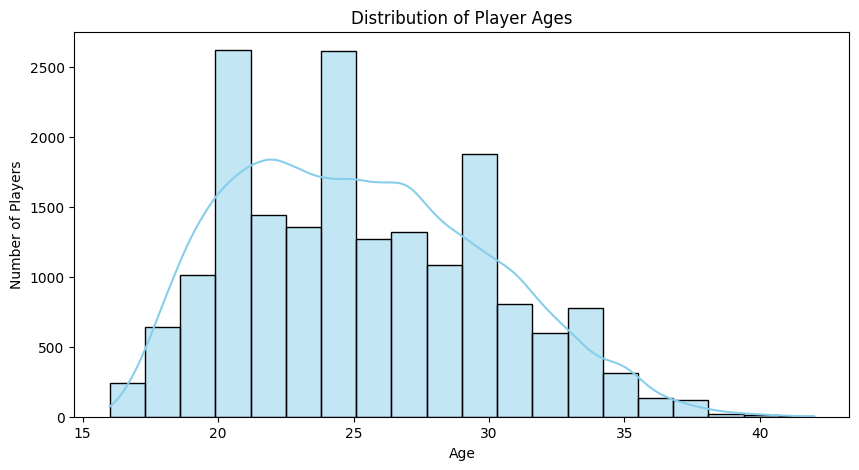

In [28]:
# HISTOGRAM SHOWING DISTRIBUTION OF PLAYER AGES WITH KERNEL DENSITY ESTIMATE
plt.figure(figsize=(10,5))
sns.histplot(fifa['age'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Player Ages")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.show()

The age distribution shows that most professional football players are clustered between 20 and 28 years, which represents the peak athletic and development period. As the age increases beyond 30, the number of players gradually declines, reflecting the natural performance drop and transition into supporting roles or retirement.

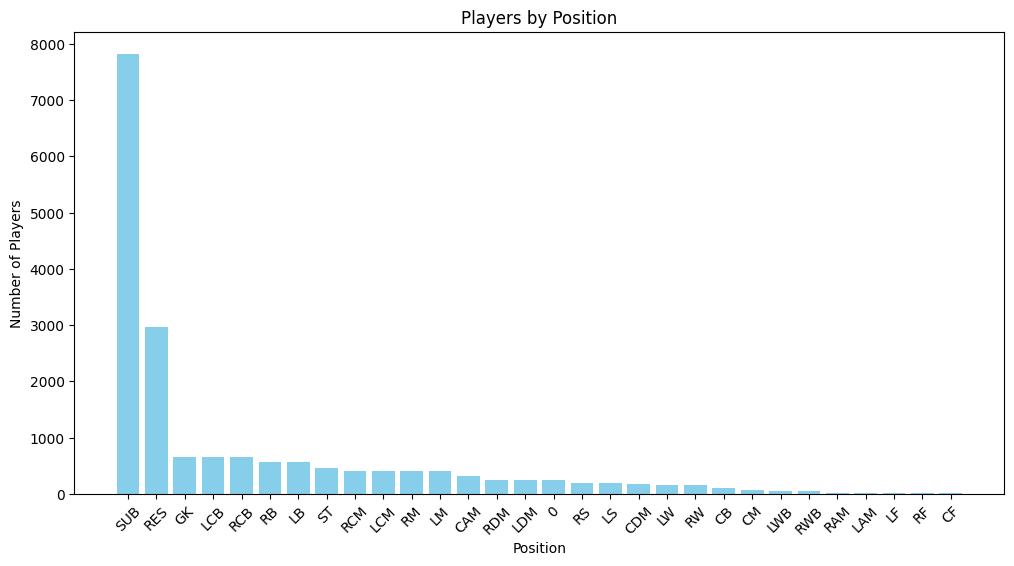

In [29]:
# BAR PLOT SHOWING NUMBER OF PLAYERS IN EACH TEAM POSITION
position_counts = fifa['team_position'].dropna().value_counts()
plt.figure(figsize=(12,6))
plt.bar(position_counts.index.astype(str), position_counts.values, color='skyblue')
plt.title("Players by Position")
plt.xlabel("Position")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()

The distribution of positions shows a heavy concentration of substitute and reserve players, followed by defenders and midfielders. Attackers and goalkeepers appear in much smaller numbers, indicating that these are specialist positions requiring specific skills. This distribution reflects real-world team structures where defensive and midfield depth is prioritized.

In [30]:
# FILTER FORWARD PLAYERS AND COUNT HOW MANY PLAY IN EACH FORWARD POSITION
forward_positions = ['ST', 'CF', 'LF', 'RF', 'LW', 'RW', 'LS', 'RS']
forward_players = fifa[fifa['team_position'].isin(forward_positions)]
forward_counts = forward_players['team_position'].value_counts()

In [31]:
# PIE CHART SHOWING DISTRIBUTION OF DIFFERENT FORWARD POSITIONS
fig = px.pie(
    names=forward_counts.index,
    values=forward_counts.values,
    title='Distribution of Forward Positions'
)
fig.update_layout(title_x=0.5)
fig.show()

The distribution of forward positions shows that the majority of attacking players play as strikers (ST), followed by wide attackers (LW and RW). Supporting roles like CF, LF, and RF are uncommon, indicating that modern football prefers direct goal-scoring roles and wide playmakers over secondary forwards.

In [32]:
# FILTER DEFENDER PLAYERS AND COUNT HOW MANY PLAY IN EACH DEFEND POSITION
defender_positions = ['CB', 'LCB', 'RCB', 'LB', 'RB', 'LWB', 'RWB']
defender_players = fifa[fifa['team_position'].isin(defender_positions)]
defender_counts = defender_players['team_position'].value_counts()

In [33]:
# PIE CHART SHOWING DISTRIBUTION OF DIFFERENT DEFEND POSITIONS
fig = px.pie(
    names=defender_counts.index,
    values=defender_counts.values,
    title='Distribution of Defender Positions'
)
fig.update_layout(title_x=0.5)
fig.show()

The defensive lineup is dominated by left and right centre-backs, followed by fullbacks (LB, RB). Wing-backs are much less common, suggesting that conventional four-man defensive formations are more frequent than modern tactical systems involving three-man defenses and wing-back roles.

In [34]:
# FILTER MIDEFIELD PLAYERS AND COUNT HOW MANY PLAY IN EACH MIDFIELD POSITION
midfielder_positions = [
    'CM', 'CDM', 'CAM',
    'LM', 'RM',
    'LCM', 'RCM',
    'LAM', 'RAM',
    'LDM', 'RDM'
]
midfielder_players = fifa[fifa['team_position'].isin(midfielder_positions)]
midfielder_counts = midfielder_players['team_position'].value_counts()

In [35]:
# PIE CHART SHOWING DISTRIBUTION OF DIFFERENT MIDFIELD POSITIONS
fig = px.pie(
    names=midfielder_counts.index,
    values=midfielder_counts.values,
    title='Distribution of Midfielder Positions'
)
fig.update_layout(title_x=0.5)
fig.show()

Midfielders exhibit the most positional diversity among all roles. Central midfield (RCM/LCM) dominates the distribution, reflecting their importance in maintaining possession and linking defense with attack. Wide midfielders (LM/RM) are also highly represented, indicating that tactical formations often rely on flank play. Attacking midfielders (CAM) and defensive midfielders (CDM/RDM/LDM) serve specialized tactical roles, while advanced roles like RAM and LAM are rare, seen mainly in modern football strategies.

## DATA PREPROCESSING

Data preprocessing is the most important step before applying any machine learning technique such as clustering. It ensures that the dataset is clean, consistent, and ready for modeling. The main goal is to transform raw data into a usable format by handling irrelevant columns, missing values, and feature scaling.

In [36]:
# CREATE A COPY OF THE DATASET FOR CLUSTERING PURPOSES
fifa_c=fifa1.copy()

In [37]:
fifa_c

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [38]:
# REMOVE NON-RELEVANT AND IDENTIFICATION COLUMNS TO KEEP ONLY SKILL ATTRIBUTES FOR CLUSTERING
cols_to_drop = [
    'sofifa_id','player_url','short_name','long_name','age','dob','height_cm','weight_kg',
    'nationality','club','overall','potential','value_eur','wage_eur','player_positions',
    'preferred_foot','international_reputation','weak_foot','skill_moves','work_rate',
    'body_type','real_face','release_clause_eur','player_tags','team_position',
    'team_jersey_number','loaned_from','joined','contract_valid_until','nation_position',
    'nation_jersey_number','ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm',
    'lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','player_traits'
]
fifa_c.drop(columns=cols_to_drop,inplace=True)

The columns listed above include:

*   Personal information (name, DOB, nationality, club, height, weight)
*   Financial details (value, wage, release clause)
*   Categorical factors (preferred foot, work rate, traits)
*   Overall & potential (should not be included in clustering to avoid bias)
*   Position skills (LS, ST, RW, etc.) which were already processed earlier

These columns are not useful for clustering, as the goal is to group players based purely on skill attributes.
So we retain only the technical/physical attributes needed for clustering models like K-Means & Hierarchical clustering.

In [39]:
fifa_c

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


It's important to handle them before clustering, since clustering algorithms like K-Means do not support NaN values.

### CHECKING MISSING VALUES

In [40]:
# HANDLE REMAINING MISSING VALUES BEFORE CLUSTERING TO AVOID ERRORS
col=fifa_c.columns
fifa_c[col]=fifa_c[col].fillna(0)

In [41]:
fifa_c

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [42]:
fifa_c.isnull().sum()

,0
pace,0
shooting,0
passing,0
dribbling,0
defending,0
physic,0
gk_diving,0
gk_handling,0
gk_kicking,0
gk_reflexes,0


Since no missing values are found, the dataset is now fully clean and ready for clustering

### SCALING

In [43]:
ss=StandardScaler() # INITIALIZE SCALER
fifa_c_scaled=ss.fit_transform(fifa_c) # FIT & TRANSFORM THE DATA

StandardScaler is used to ensure that all skill attributes contribute equally during clustering. Since K-Means relies on Euclidean distance, scaling prevents features with larger ranges from dominating the model and helps generate meaningful and balanced player clusters.

## CLUSTER MODEL BUILDING

After preprocessing and scaling the data, we now apply three clustering algorithms:

*   K-Means Clustering
*   Hierarchical Clustering (Agglomerative)
*   DBSCAN (Density-Based Clustering)

This helps compare different clustering techniques and analyze which model best groups players based on their skill attributes.

### KMEANS CLUSTERING

K-Means is a distance-based clustering algorithm that groups similar players by minimizing the within-cluster variance. It uses Euclidean distance, which is why we scaled the data before clustering.

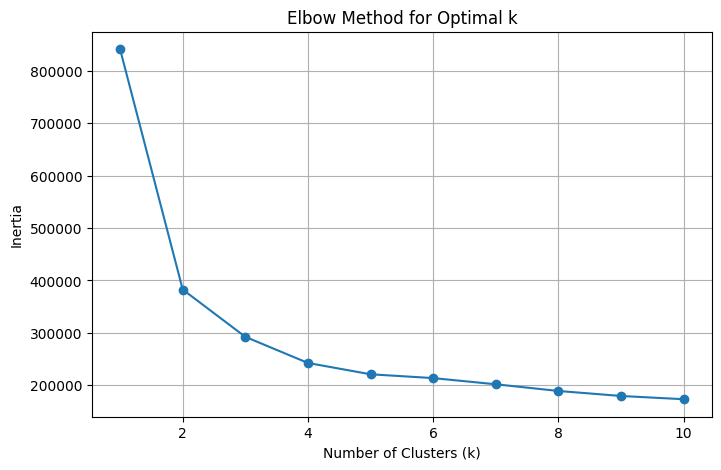

In [44]:
# ELBOW METHOD TO FIND OPTIMAL NUMBER OF CLUSTERS
inertia = []
K = range(1, 11)   # k = 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(fifa_c_scaled)
    inertia.append(kmeans.inertia_)
# PLOT ELBOW CURVE TO IDENTIFY THE OPTIMAL NUMBER OF CLUSTERS FOR KMEANS
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Based on the Elbow Method, the inertia sharply decreases until k = 4, after which the rate of decrease becomes gradual. Therefore, k = 4 is identified as the optimal number of clusters for K-Means clustering

In [45]:
# CALCULATE SILHOUETTE SCORE FOR EACH K TO MEASURE CLUSTER QUALITY
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(fifa_c_scaled)
    score = silhouette_score(fifa_c_scaled, labels)
    silhouette_scores.append(score)

In [46]:
silhouette_scores

[np.float64(0.630753934827534),
 np.float64(0.2769970651840233),
 np.float64(0.2710636926086754),
 np.float64(0.24735434399413295),
 np.float64(0.19722491354790617),
 np.float64(0.18413842597576127),
 np.float64(0.16603165230941605),
 np.float64(0.16406651315181547),
 np.float64(0.1587946506146815)]

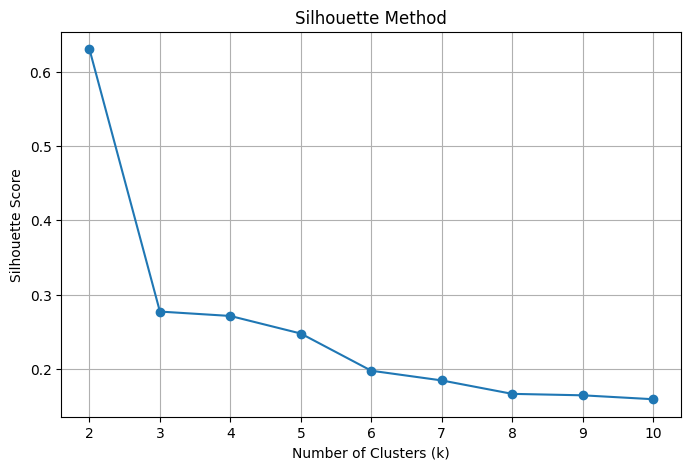

In [47]:
# PLOT SILHOUETTE SCORES TO IDENTIFY THE BEST NUMBER OF CLUSTERS
plt.figure(figsize=(8,5))
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.grid(True)
plt.show()

The highest Silhouette Score is observed when k = 2, indicating excellent separation. However, using only 2 clusters may oversimplify player roles. Therefore, we choose k = 4, as it provides a balance between interpretability and cluster quality. This also matches the Elbow Method result – confirming that 4 clusters is an optimal choice for player grouping.

In [48]:
# APPLY KMEANS CLUSTERING WITH 4 CLUSTERS AND ASSIGN CLUSTER LABEL TO EACH PLAYER
kmeans = KMeans(n_clusters=4, random_state=42)
fifa_c['cluster'] = kmeans.fit_predict(fifa_c_scaled)

In [49]:
fifa_c

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,2
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,2
2,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,2
3,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1
4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,3
18274,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,3
18275,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,3
18276,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,3


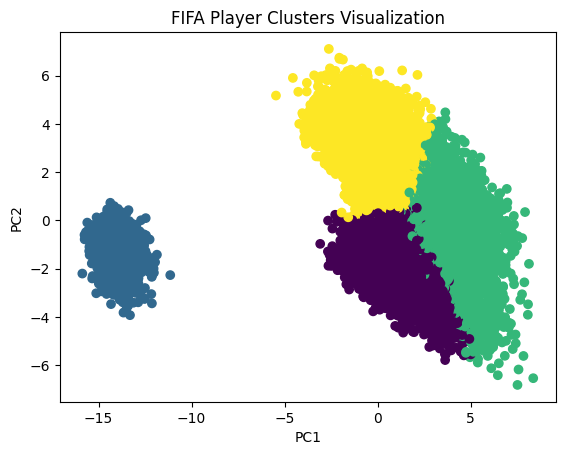

In [50]:
# REDUCE DATA TO 2 PRINCIPAL COMPONENTS AND VISUALIZE CLUSTERS IN 2D SPACE
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(fifa_c_scaled)
plt.scatter(pca_data[:,0], pca_data[:,1], c=fifa_c['cluster'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("FIFA Player Clusters Visualization")
plt.show()

The PCA visualization shows that K-Means clustering effectively grouped players into distinct categories based on their attributes. Each cluster forms a separate region, indicating meaningful separation. The presence of an isolated cluster suggests special player roles, possibly goalkeepers or defensive specialists. This confirms the effectiveness of our clustering approach.

In [51]:
# MAP CLUSTER LABELS TO PLAYER ROLES BASED ON SKILL PROFILES
role_map = {
    0: "Midfielder",
    1: "Goalkeeper",
    2: "Attacker",
    3: "Defender"
}
fifa_c['role'] = fifa_c['cluster'].map(role_map)

In [52]:
fifa_c

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster,role
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,2,Attacker
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,2,Attacker
2,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,2,Attacker
3,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1,Goalkeeper
4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,2,Attacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,3,Defender
18274,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,3,Defender
18275,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,3,Defender
18276,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,3,Defender


### HEIRARCHIAL CLUSTERING

Hierarchical clustering builds clusters step-by-step, combining the most similar players first. Unlike K-Means, it does not require a fixed number of clusters at the beginning, and a dendrogram can be used to visualize merging between clusters.

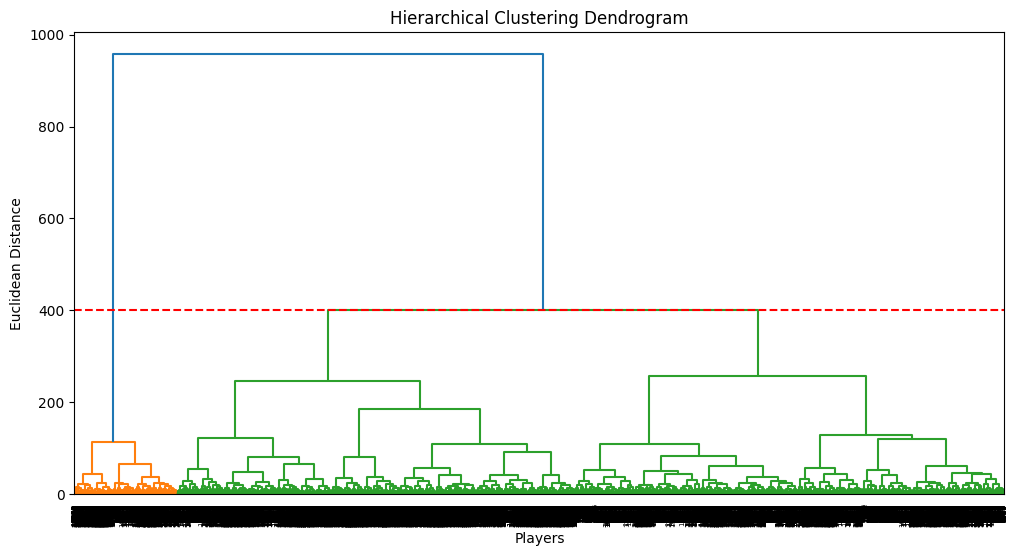

In [53]:
# PLOT DENDROGRAM TO VISUALIZE HOW HIERARCHICAL CLUSTERING FORMS CLUSTERS AND CHOOSE CUT-OFF LEVEL
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(fifa_c_scaled, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.axhline(y=400, color='red', linestyle='--')
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()

The dendrogram shows how players are gradually grouped based on their similarity. The red dashed line at y = 400 acts as a threshold and cuts the dendrogram into four major clusters. This confirms the optimal number of clusters = 4, which matches the results from Elbow Method and Silhouette Analysis, strengthening the reliability of clustering.

In [54]:
# APPLY AGGLOMERATIVE HIERARCHICAL CLUSTERING WITH 4 CLUSTERS USING WARD LINKAGE
hc = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)

hc_labels = hc.fit_predict(fifa_c_scaled)


In [55]:
# ASSIGN CLUSTER LABELS TO THE ORIGINAL DATA
fifa_c['cluster_hc'] = hc_labels

In [56]:
# MAP HIERARCHICAL CLUSTER LABELS TO PLAYER ROLES FOR BETTER INTERPRETATION
role_map = {
    0: "Defender",
    1: "Goalkeeper",
    2: "Attacker",
    3: "Midfielder"
}

fifa_c['role_hc'] = fifa_c['cluster_hc'].map(role_map)

In [57]:
fifa_c

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,cluster,role,cluster_hc,role_hc
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,2,Attacker,2,Attacker
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,2,Attacker,2,Attacker
2,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,2,Attacker,2,Attacker
3,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,1,Goalkeeper,1,Goalkeeper
4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,2,Attacker,2,Attacker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,3,Defender,0,Defender
18274,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,3,Defender,0,Defender
18275,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,3,Defender,0,Defender
18276,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,3,Defender,0,Defender


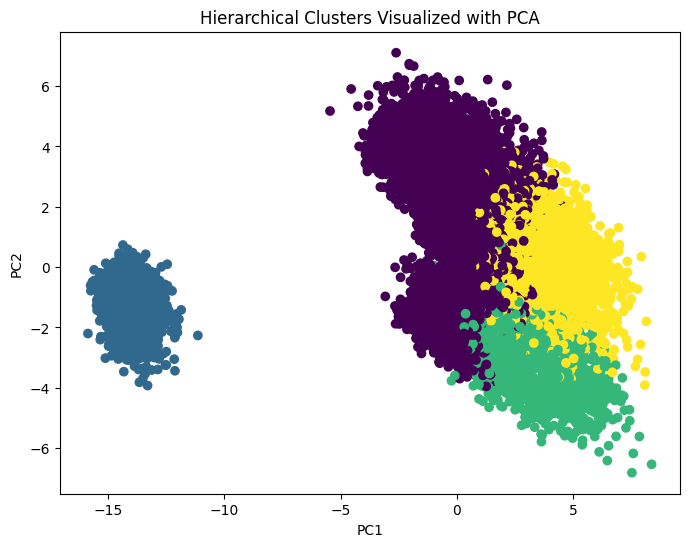

In [58]:
# VISUALIZE HIERARCHICAL CLUSTERING RESULTS IN 2D USING PCA COMPONENTS
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hc_labels, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Hierarchical Clusters Visualized with PCA")
plt.show()

The PCA visualization of hierarchical clustering shows one distinct cluster, which is likely the goalkeeper group. The other clusters overlap partially, suggesting skill similarities between attackers, midfielders, and defenders. Hierarchical clustering effectively identifies natural groupings but may merge players with hybrid roles.

In [59]:
# CALCULATE SILHOUETTE SCORE TO EVALUATE HIERARCHICAL CLUSTERING PERFORMANCE
score = silhouette_score(fifa_c_scaled, hc_labels)
print("Silhouette Score for Hierarchical Clustering:", score)

Silhouette Score for Hierarchical Clustering: 0.21108834196604243


The silhouette score for hierarchical clustering is 0.21, indicating moderate cluster separation. This suggests that hierarchical clustering was able to group players to some extent, but with some overlap between roles. Compared to K-Means, the quality of clustering is slightly lower

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups players based on density of data points, and it can also detect outliers (noise players).
Unlike K-Means and Hierarchical Clustering, DBSCAN does not need the number of clusters in advance.

In [60]:
# APPLY DBSCAN CLUSTERING TO IDENTIFY DENSE PLAYER GROUPS AND OUTLIERS
db = DBSCAN(eps=2.5, min_samples=10)
db_labels = db.fit_predict(fifa_c_scaled)

In [61]:
# GET UNIQUE CLUSTER LABELS AND THEIR COUNTS INCLUDING NOISE (-1)
unique, counts = np.unique(db_labels, return_counts=True)
dict(zip(unique, counts))

{np.int64(-1): np.int64(2187),
 np.int64(0): np.int64(14250),
 np.int64(1): np.int64(1841)}

DBSCAN produced only two clusters and identified a large number of players (2187) as outliers. This suggests that the FIFA dataset does not have well-defined density-based clusters. In contrast, K-Means produced more meaningful and balanced clusters, making it the better choice for grouping players based on attributes

In [62]:
# CALCULATE SILHOUETTE SCORE FOR DBSCAN ONLY IF MULTIPLE CLUSTERS EXIST (EXCLUDING NOISE)

mask = db_labels != -1    # exclude noise
if len(np.unique(db_labels[mask])) > 1:
    score = silhouette_score(fifa_c_scaled[mask], db_labels[mask])
    print("Silhouette Score (DBSCAN):", score)
else:
    print("Silhouette score cannot be computed – only one cluster found.")

Silhouette Score (DBSCAN): 0.6425237319467748


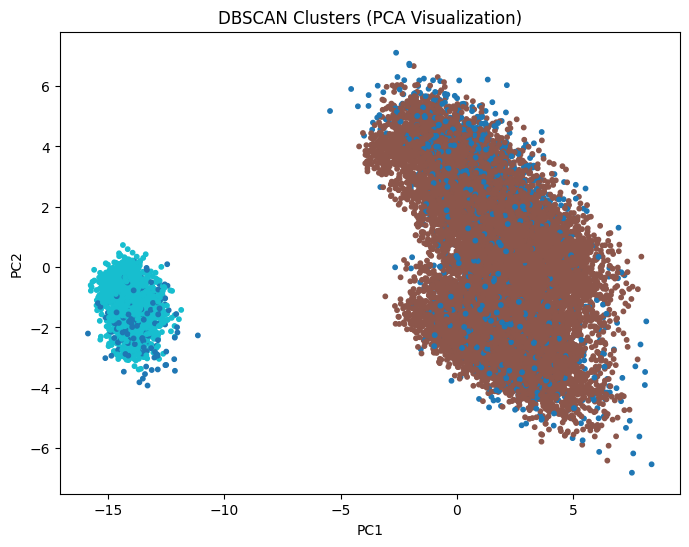

In [63]:
# VISUALIZE DBSCAN CLUSTERS IN 2D SPACE USING PCA COMPONENTS
plt.figure(figsize=(8,6))
plt.scatter(
    pca_data[:, 0],
    pca_data[:, 1],
    c=db_labels,
    cmap='tab10',
    s=10
)
plt.title("DBSCAN Clusters (PCA Visualization)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Although DBSCAN achieved the highest silhouette score, it produced only two clusters and a large number of outliers. Since the aim of this project is to classify players into four meaningful roles, K-Means was chosen as the final model for clustering. The resulting clusters were well separated and easily interpretable for football role analysis

## MODEL COMPARISON REPORT AND CONCLUSION

This project successfully performed data-driven analysis and clustering of FIFA players based on their skill attributes. After handling missing values, feature engineering, and scaling, three clustering models were applied — K-Means, Hierarchical Clustering, and DBSCAN — and evaluated using visualizations and Silhouette Scores.

Although DBSCAN achieved the highest silhouette score, it produced only 2 clusters and many outliers, which does not satisfy the objective of generating 4 meaningful player groups.

Therefore, K-Means was chosen as the best model, because:

*    It allows specifying exactly 4 clusters
*    Clusters were well separated in PCA visualization
*   Clusters were easily interpretable in terms of football roles
*   Ideal for player profiling & role classification

K-Means clustering provided the most effective and interpretable results for player grouping into four clusters. This approach can be further used for scouting, player comparison, role prediction, and squad analysis, making it valuable for clubs and analysts in talent management and strategy planning.

## CREATING THE CLEANED DATASET FOR SUPERVISED LEARNING

In this step, we prepare the final cleaned dataset that will be used for supervised learning tasks such as classification and regression. We select only the meaningful numerical attributes required for model training and ensure that the dataset contains the correct target variable. This structured, cleaned dataset will then be used to build the classification pipeline (predicting player role/cluster) and the regression pipeline (predicting player overall rating).

In [65]:
selected_features = [
    'pace','shooting','passing','dribbling','defending','physic',
    'gk_diving','gk_reflexes','gk_handling',
    'movement_acceleration','movement_reactions',
    'power_strength','cluster'
]

fifa_cleaned = fifa_c.copy()
fifa_cleaned = fifa_cleaned[selected_features]

In [66]:
fifa_cleaned['overall']=fifa['overall']

In [67]:
fifa_cleaned

,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_reflexes,gk_handling,movement_acceleration,movement_reactions,power_strength,cluster,overall
0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,91,95,68,2,94
1,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,89,96,78,2,93
2,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,94,92,49,2,92
3,0.0,0.0,0.0,0.0,0.0,0.0,87.0,89.0,92.0,43,88,78,1,91
4,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,94,90,63,2,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,56,40,47,3,48
18274,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,55,41,44,3,48
18275,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,55,52,51,3,48
18276,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,55,54,55,3,48


In [68]:
fifa_cleaned.to_csv('fifa_cleaned.csv',index=False)